In [1]:
#CUSTOMER CHURN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#load data
df = pd.read_csv("CreditRisk.csv")

In [3]:
#Change text to integers data type.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [4]:
df.head()

,Credit_Hist,Gender,Employment,Marital status,Housing,Credit_Std
0,1,0,1,0,0,0
1,1,1,1,2,0,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,1,1,0,0,1,1


In [5]:
# Churners vs Non-Churners
df['Churn'].value_counts()

KeyError: 'Churn'

In [6]:
print(df.columns)

Index(['Credit_Hist', 'Gender', 'Employment', 'Marital status', 'Housing',
       'Credit_Std'],
      dtype='object')


In [7]:
df['Credit_Std'].value_counts()

Credit_Std
1    214
0    211
Name: count, dtype: int64

In [8]:
print(df.groupby('Credit_Std')['TotalCharges'].mean())

KeyError: 'Column not found: TotalCharges'

In [9]:
print(df.groupby('Credit_Std')['Employment'].mean())

Credit_Std
0    0.369668
1    0.476636
Name: Employment, dtype: float64


In [10]:
# Count the number of entries for each 'Credit_Std' value by 'Housing'
print(df.groupby('Housing')['Credit_Std'].value_counts())

Housing  Credit_Std
0        0              80
         1              53
1        1             161
         0             131
Name: count, dtype: int64


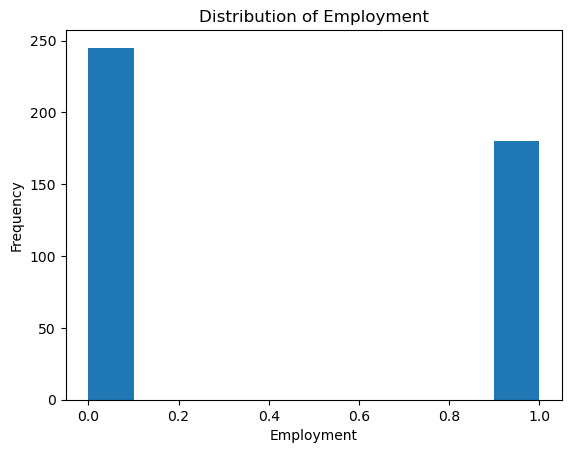

In [11]:
import matplotlib.pyplot as plt

# Visualize the distribution of 'Employment'
plt.hist(df['Employment'], bins=10)
plt.title('Distribution of Employment')
plt.xlabel('Employment')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Check for null values
df.isna().sum()

Credit_Hist       0
Gender            0
Employment        0
Marital status    0
Housing           0
Credit_Std        0
dtype: int64

In [13]:
#Remove null values
df.dropna(inplace = True)

In [14]:
# Define x and y with adapted columns
x = df[['Credit_Hist', 'Gender', 'Employment', 'Marital status', 'Housing']]
y = df['Credit_Std']

In [15]:
# Define the x and y variables with columns
x = df.drop('Credit_Std', axis='columns')  # Drop the target variable column from x
y = df['Credit_Std']  # Target variable


In [16]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Credit_Std', axis='columns')

scaler = StandardScaler()

scaler.fit(x)



StandardScaler()

In [17]:
#split data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [18]:
##create the model with sklearn
CustChurMOD = LogisticRegression()
CustChurMOD.fit(x_train, y_train)


LogisticRegression()

In [19]:
#check result
CustChurMOD.score(x_train, y_train)

0.5970588235294118

In [20]:
#Test the model - using the test data 
CustChurMOD.score(x_test, y_test)

0.5411764705882353

In [21]:
# create the predict model
y_pred = CustChurMOD.predict(x_test)

In [22]:
#Evaluate the model performance (Accuracy score)
print(accuracy_score(y_test, y_pred))

0.5411764705882353


In [23]:
#evaluate the model - confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[23 19]
 [20 23]]


In [24]:
#add the predicted and actual values into a new dataframe
CustPRED=pd.DataFrame({'Actual': y_test, 'predicted': y_pred})

In [25]:
#print the new dataframe
print(CustPRED)

     Actual  predicted
229       1          1
159       0          0
54        1          0
208       1          1
10        0          0
..      ...        ...
45        1          0
144       1          0
4         1          0
224       1          1
213       0          1

[85 rows x 2 columns]


In [26]:
#Save the dataframe to Excel
CustPRED.to_csv("CreditRisk.csv")